

## Schelling Model - Motivation 

Many US cities are extremely racially segregated. People from the same race tend to live in the same neighborood. The map below is from Chicago. 

<img src="silver-segregation-hydepark-dot.png" alt="alt text" width="400"/>


This is a phenomenon that is common to most US cities, and also some European ones. Here is a map of London, showing a similar segregation:

<img src="http://blogs.lshtm.ac.uk/news/files/2013/12/ethnic_density.jpg" alt="alt text" width="400"/>


Homophily: people tend to hang out with other people with similar characteristics. Schelling modelled this mechanism in a very simple setup, and then showed that, even abstracting from explanations relying on intolerance and racism, we would still get a pretty segregated urban landscape. 


## The Model

<img src="CA-Moore.png" alt="alt text" width="200"/>

Simple rule: if the ratio of neighbours that belong to your race is lower than a specified threshold, you want to move to another neighbourhood, otherwise you stay where you are. A person that wants to stay is usually said to be satisfied with the location. A person that wants to move is called unsatisfied. 



## The code


In [80]:
import matplotlib.pyplot as plt
import itertools
import random
import copy

#### A. Create a class called **Schelling**

Constructor method, i.e. a function that will create an instance of the class with the attributes we want this class to have. Fill in the gaps in the following cell:

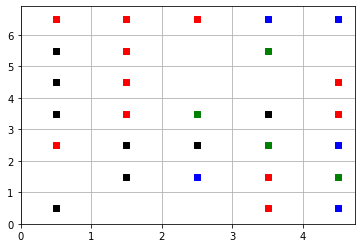

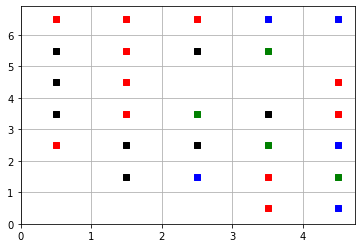

In [84]:
import random
import itertools
import matplotlib.pyplot as plt
import numpy as np

class Schelling():
    
    def __init__(self, width, height, empty, similarity, n, races): # this is the constructor method, add all the arguments of this method as specified in the instructions
        # add attributes here:
        self.width = width
        self.height = height
        self.empty_ratio = empty
        self.similarity_threshold = similarity
        self.n_iterations = n
        self.races = races
    
    def populate(self):      
        self.empty_houses = [] 
#         self.occupied_houses = []
        self.agents = {} #dict()
        self.all_houses = list(itertools.product(range(0,self.width), range(0,self.height)))
        random.shuffle(self.all_houses)
        self.n_empty = int(self.empty_ratio * len(self.all_houses))
        self.isfull = [True] * len(self.all_houses)  #True for full, false for empty
        self.isfull[-self.n_empty:] = [False]*self.n_empty
        houses_by_races = []
        for i in range(0,(len(self.all_houses)-self.n_empty)):
            n = random.randint(1,self.races)
            houses_by_races.append(n)
        houses_by_races = houses_by_races + ([0] * self.n_empty)
        self.tuple1 = tuple(zip(self.isfull, houses_by_races))
        self.tuple2 = tuple(zip(self.all_houses, self.tuple1))
        self.agents.update(self.tuple2)
       #self.agents is our full dictionary containing all the agents 
        #create list for empty houses
        for i in self.agents: 
            if self.agents[i][0] == False : 
                self.empty_houses.append(i)
#             if self.agents[i][0] == True : 
#                 self.occupied_houses.append(i)
    
    #function that plots the scatter graph 
    def plot_city(self): 
        dict1 = {0: 'w', 1: 'r', 2: 'b', 3: 'g', 4: 'k' }
        for key, value in self.agents.items():
            plt.scatter(key[0]+0.5,key[1]+0.5, marker = "s", color = dict1[value[1]])
        plt.xticks(range(0, self.width))
        plt.yticks(range(0, self.height))
        plt.grid()
        plt.show()
    
    # checks if person is unsatisfied or unoccupied 
    def is_unsatisfied(self, cell):
        difference = list(itertools.product(range(-1,2),range(-1,2)))
        difference.remove((0,0))
        self.neighbours = [(cell[0]+elem[0],cell[1]+elem[1]) for elem in difference]
        count_sim = 0
        count_tot = 0
        for m in self.neighbours:
            if m in self.agents: 
                count_tot = count_tot + 1 
                race = self.agents[m][0] 
                if race == self.agents[cell][0]: 
                    count_sim = count_sim + 1
        if count_sim / count_tot < self.similarity_threshold:
#             print(count_tot)
#             print(count_sim / count_tot)
            return True 
        else : 
            return False
        
#     def sim_index(self):
#         print (count_sim / count_tot )
        

    def update(self): 
        num_updates = 0 
         #add an update constraint  
        for cell in self.agents: 
            if self.is_unsatisfied(cell):
                num_updates+=1
                # cell becomes a random choice of empty houses list and it is updated 
                a = random.choice(self.empty_houses)
                self.empty_houses.append(cell)
                self.empty_houses.remove(a)

#                 # occupied houses list is also updated
#                 self.occupied_houses.append(a)
#                 self.occupied_houses.remove(cell)

                #update dictionary 
                self.agents.update({a : self.agents[cell]})
                self.agents.update({cell : (False, 0)})
    
                
        return num_updates
    
                    
test = Schelling(5, 7, 0.2, 0.5, 1000, 4)
test.populate()
test.plot_city()
# test.is_unsatisfied((3,2))
num_updates=test.update()
# test.sim_index()
i=0
while i < test.n_iterations and num_updates !=0:
    num_updates= test.update()
#     print(num_updates)
    i+=1
    
test.plot_city()
